In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

### Perceptron


In [59]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
# setosa and versicolor
y = df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [62]:
class Perceptron(object):
  def __init__(self,epochs= 50,lr = 0.01):
    self.lr = lr
    self.epochs =50
  def train(self,X,y):
            self.w_ = np.zeros(1 + X.shape[1])
            self.errors_ = []
            for _ in range(self.epochs):
              errors = 0
              for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
              return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):
    return self.net_input(X)
  def predict(self, X):
    return np.where(self.activation(X) >= 0.0, 1, -1)


Weights: [0.   0.38 0.66]


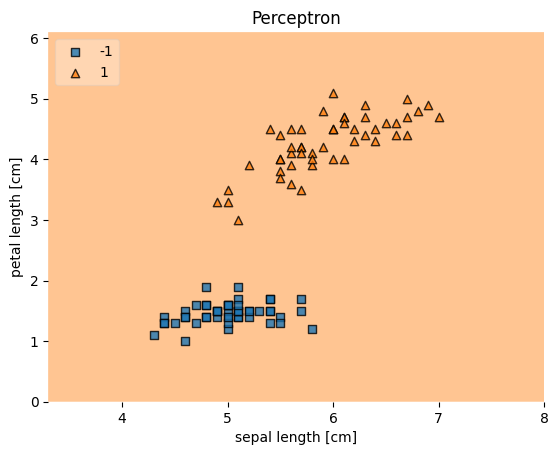

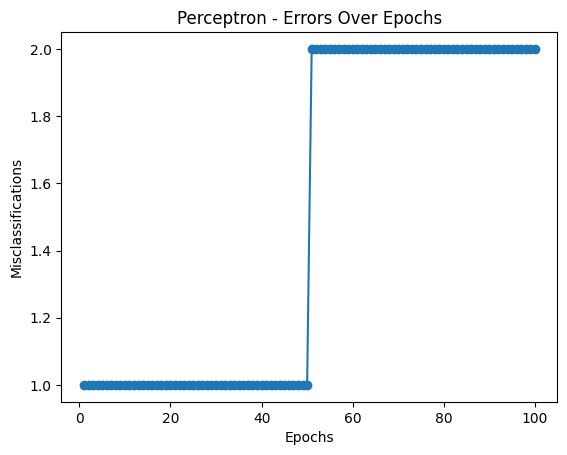

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, lr=0.1)
ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn, legend=2)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.title("Perceptron - Errors Over Epochs")
plt.show()